Instalamos el servicio de Sentence-Transformer.

In [ ]:
import sys
!{sys.executable} -m pip install sentence-transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
print("SentenceTransformer model 'all-MiniLM-L6-v2' loaded successfully.")

Creamos las funciones de nuestro proyecto relacionado a la salud. Registrarse, agendar citas, ver examenes, atender emergencias, etc.

In [2]:
import pandas as pd

# Define the data for hospital functions
data = [
    {
        'id': 1,
        'nombre de la funcion': 'Administración de Pacientes',
        'descripcion de la funcion': 'Registro, admisión, y gestión de historiales clínicos de pacientes.'
    },
    {
        'id': 2,
        'nombre de la funcion': 'Gestión de Citas Médicas',
        'descripcion de la funcion': 'Programación y seguimiento de citas con especialistas y médicos generales.'
    },
    {
        'id': 3,
        'nombre de la funcion': 'Resultados de Laboratorio',
        'descripcion de la funcion': 'Procesamiento y entrega de resultados de análisis de sangre, orina y otros diagnósticos.'
    },
    {
        'id': 4,
        'nombre de la funcion': 'Servicios de Radiología',
        'descripcion de la funcion': 'Realización de radiografías, resonancias magnéticas y otros estudios de imagen.'
    },
    {
        'id': 5,
        'nombre de la funcion': 'Atención de Emergencias',
        'descripcion de la funcion': 'Asistencia médica inmediata para casos de urgencia y accidentes graves.'
    },
    {
        'id': 6,
        'nombre de la funcion': 'Facturación y Seguros',
        'descripcion de la funcion': 'Gestión de cobros, presupuestos, facturación y coordinación con compañías de seguros.'
    },
    {
        'id': 7,
        'nombre de la funcion': 'Farmacia Hospitalaria',
        'descripcion de la funcion': 'Dispensación de medicamentos y gestión de inventario farmacéutico.'
    },
    {
        'id': 8,
        'nombre de la funcion': 'Quirófanos y Cirugías',
        'descripcion de la funcion': 'Programación y ejecución de procedimientos quirúrgicos y post-operatorios.'
    },
    {
        'id': 9,
        'nombre de la funcion': 'Unidad de Cuidados Intensivos (UCI)',
        'descripcion de la funcion': 'Cuidado y monitoreo de pacientes en estado crítico.'
    },
    {
        'id': 10,
        'nombre de la funcion': 'Rehabilitación y Fisioterapia',
        'descripcion de la funcion': 'Programas de recuperación física y terapia ocupacional para pacientes.'
    }
]

# Create the DataFrame
funcion_de_negocios = pd.DataFrame(data)

print("DataFrame 'funcion_de_negocios' created successfully.")

DataFrame 'funcion_de_negocios' created successfully.


Usamos el coseno para la similaridad y generamos los embedding.

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

def semantic_search_function(query, df):
    """
    Performs semantic search on business functions based on a user query.

    Args:
        query (str): The user's query string.
        df (pd.DataFrame): DataFrame containing business functions and their embeddings.

    Returns:
        pd.DataFrame: The DataFrame sorted by similarity to the query.
    """
    # 1. Generate the embedding for the query
    query_embedding = model.encode(query)

    # 2. Calculate cosine similarity
    query_embedding_reshaped = query_embedding.reshape(1, -1)

    # Calculate similarity with all function embeddings
    df_embeddings = df['embeddings'].tolist()
    similarities = cosine_similarity(query_embedding_reshaped, df_embeddings)[0]

    # 3. Store the calculated similarity scores in a new column
    df['similarity'] = similarities

    # 4. Sort the DataFrame by the 'similarity' column in descending order
    sorted_df = df.sort_values(by='similarity', ascending=False).reset_index(drop=True)

    return sorted_df

print("Function 'semantic_search_function' defined.")

Function 'semantic_search_function' defined.


Generamos las categorias que tendremos en el proyecto, tambien usaremos un mapping o diccionario para mejorar la similaridad con el query.

In [4]:
medical_options = {
    'registro': 'Administración de Pacientes',
    'cita': 'Gestión de Citas Médicas',
    'laboratorio': 'Resultados de Laboratorio',
    'radiologia': 'Servicios de Radiología',
    'emergencia': 'Atención de Emergencias',
    'facturacion': 'Facturación y Seguros',
    'farmacia': 'Farmacia Hospitalaria',
    'cirugia': 'Quirófanos y Cirugías',
    'uci': 'Unidad de Cuidados Intensivos (UCI)',
    'rehabilitacion': 'Rehabilitación y Fisioterapia'
}

def populate_ejemplos_clave_texto(row):
    relevant_examples = []
    texto = f"{row['nombre de la funcion']} {row['descripcion de la funcion']}".lower()

    mapping = {
    'registro': [
        'registro', 'admisión', 'ingreso', 'expediente', 'documentación', 'consentimiento informado',
        'actualización de datos', 'base de datos de pacientes', 'identificación del usuario',
        'trámites burocráticos', 'atención al usuario', 'apertura de expediente',
        'verificación de identidad', 'recepción de documentos', 'filiación', 'trámite',
        'recepción', 'alta médica', 'empadronamiento'
    ],
    'cita': [
        'cita', 'programación', 'agendar', 'turno', 'especialista', 'médico general',
        'disponibilidad', 'calendario', 'reprogramar', 'telemedicina', 'consulta externa',
        'interconsulta', 'médico de cabecera', 'seguimiento médico', 'cita de control',
        'primera vez', 'orden médica', 'reserva de turno', 'agenda electrónica'
    ],
    'laboratorio': [
        'laboratorio', 'análisis de sangre', 'orina', 'muestras', 'biopsia', 'microbiología',
        'química sanguínea', 'test', 'bioquímica', 'hemograma', 'patología clínica',
        'perfil lipídico', 'urocultivo', 'coprológico', 'frotis', 'marcadores tumorales',
        'pcr', 'antígenos', 'toma de muestras', 'cultivo bacteriológico'
    ],
    'radiologia': [
        'radiografía', 'resonancia', 'tac', 'imagen', 'ecografía', 'ultrasonido',
        'mamografía', 'rayos x', 'rx', 'tomografía', 'escáner', 'densitometría ósea',
        'medio de contraste', 'medicina nuclear', 'doppler', 'biopsia dirigida por imagen',
        'estudio radiológico', 'proyección de imagen'
    ],
    'emergencia': [
        'emergencia', 'urgencia', 'accidente', 'triaje', 'asistencia inmediata',
        'reanimación', 'ambulancia', 'estabilización de signos vitales', 'trauma',
        'shock', 'primeros auxilios', 'soporte básico de vida', 'reanimación cardiopulmonar',
        'rcp', 'dolor torácico agudo', 'crisis hipertensiva', 'herida abierta', 'atención prehospitalaria'
    ],
    'facturacion': [
        'facturación', 'seguros', 'cobro', 'pago', 'presupuesto', 'póliza', 'cobertura',
        'copago', 'contabilidad', 'honorarios médicos', 'auditoría médica', 'liquidación de servicios',
        'cuentas médicas', 'manual tarifario', 'autorización de aseguradora', 'nota débito',
        'nota crédito', 'deducible', 'recaudo'
    ],
    'farmacia': [
        'farmacia', 'medicamento', 'fármaco', 'dispensación', 'dosis', 'receta', 'botiquín',
        'inventario', 'stock', 'suministro', 'insumos médicos', 'farmacovigilancia',
        'cadena de frío', 'unidosis', 'psicotrópicos', 'central de mezclas', 'dispositivos médicos'
    ],
    'cirugia': [
        'quirófano', 'cirugía', 'intervención', 'anestesia', 'laparoscopia', 'post-operatorio',
        'quirúrgico', 'procedimiento invasivo', 'bisturí', 'sutura', 'asepsia', 'antisepsia',
        'anestesiología', 'equipo quirúrgico', 'prótesis e implantes', 'cirugía mayor',
        'cirugía ambulatoria', 'recuperación inmediata'
    ],
    'uci': [
        'uci', 'crítico', 'monitoreo', 'soporte vital', 'cuidados intensivos', 'ventilación mecánica',
        'asistencia respiratoria', 'hemodinámica', 'gravedad', 'coma inducido', 'soporte multiorgánico',
        'catéter central', 'monitorización hemodinámica invasiva', 'falla renal aguda', 'paciente inestable'
    ],
    'rehabilitacion': [
        'rehabilitación', 'fisioterapia', 'terapia', 'recuperación', 'ejercicio físico',
        'kinesiología', 'movilidad', 'psicomotricidad', 'hidroterapia', 'masoterapia',
        'terapia ocupacional', 'fonoaudiología', 'terapia de lenguaje', 'estimulación temprana',
        'órtesis', 'reeducación de la marcha'
    ]
    }

    for categoria, keywords in mapping.items():
        if any(kw in texto for kw in keywords):
            # Asumiendo que medical_options tiene estas 10 llaves
            if categoria in medical_options:
                relevant_examples.append(medical_options[categoria])

    return '; '.join(relevant_examples)

# Apply the function to create the 'dictionary' column
funcion_de_negocios['dictionary'] = funcion_de_negocios.apply(populate_ejemplos_clave_texto, axis=1)

print("La columna 'dictionary' ha sido poblada con ejemplos de palabras relacionadas.")
display(funcion_de_negocios[['id', 'nombre de la funcion', 'descripcion de la funcion', 'dictionary']].head())

La columna 'dictionary' ha sido poblada con ejemplos de palabras relacionadas.


,id,nombre de la funcion,descripcion de la funcion,dictionary
0,1,Administración de Pacientes,"Registro, admisión, y gestión de historiales c...",Administración de Pacientes
1,2,Gestión de Citas Médicas,Programación y seguimiento de citas con especi...,Gestión de Citas Médicas
2,3,Resultados de Laboratorio,Procesamiento y entrega de resultados de análi...,Resultados de Laboratorio
3,4,Servicios de Radiología,"Realización de radiografías, resonancias magné...",Servicios de Radiología
4,5,Atención de Emergencias,Asistencia médica inmediata para casos de urge...,Atención de Emergencias


Ingresamos nuestro query y nos presentara el top 3 de las funciones mas relacionadas con nuestra petición.

In [5]:
import pandas as pd

# Calculate embeddings for the descriptions once
funcion_de_negocios['embeddings'] = funcion_de_negocios['descripcion de la funcion'].apply(lambda x: model.encode(x))

print("Embeddings for 'descripcion de la funcion' generated successfully.")


user_query = input("Por favor, ingrese una nueva consulta (query) en español para la búsqueda semántica: ")
print(f"Nueva consulta ingresada: '{user_query}'")

sorted_functions_df = semantic_search_function(user_query, funcion_de_negocios)
top_n_results = sorted_functions_df.head(3)
print(f"Top 3 funciones de negocio más relevantes para la consulta: '{user_query}'")
display(top_n_results[['id', 'nombre de la funcion', 'descripcion de la funcion', 'similarity']])

Embeddings for 'descripcion de la funcion' generated successfully.
Por favor, ingrese una nueva consulta (query) en español para la búsqueda semántica: quiero una pizza
Nueva consulta ingresada: 'quiero una pizza'
Top 3 funciones de negocio más relevantes para la consulta: 'quiero una pizza'


,id,nombre de la funcion,descripcion de la funcion,similarity
0,6,Facturación y Seguros,"Gestión de cobros, presupuestos, facturación y...",0.250874
1,2,Gestión de Citas Médicas,Programación y seguimiento de citas con especi...,0.209146
2,8,Quirófanos y Cirugías,Programación y ejecución de procedimientos qui...,0.192288


In [ ]:
!pip install gradio

In [ ]:
# @title
import gradio as gr

def gradio_semantic_search(query):
    """
    Wrapper function for semantic_search_function to be used with Gradio.
    Returns a formatted string of the top 3 relevant functions.
    """
    if not isinstance(funcion_de_negocios, pd.DataFrame) or 'embeddings' not in funcion_de_negocios.columns:
        return "Error: DataFrame 'funcion_de_negocios' or 'embeddings' column not found. Please run previous cells."

    sorted_functions_df = semantic_search_function(query, funcion_de_negocios.copy())
    top_n_results = sorted_functions_df.head(3)

    if top_n_results.empty:
        return "No se encontraron funciones relevantes para la consulta."

    output_str = "Top 3 funciones de negocio más relevantes:\n"
    for index, row in top_n_results.iterrows():
        output_str += f"- ID: {row['id']}\n"
        output_str += f"  Nombre: {row['nombre de la funcion']}\n"
        output_str += f"  Descripción: {row['descripcion de la funcion']}\n"
        output_str += f"  Similitud: {row['similarity']:.4f}\n"
        output_str += "\n"
    return output_str

# Create the Gradio interface
iface = gr.Interface(
    fn=gradio_semantic_search,
    inputs=gr.Textbox(lines=2, placeholder="Ingresa tu consulta aquí...", label="Consulta de Búsqueda"),
    outputs=gr.Textbox(lines=20, label="Resultados de la Búsqueda Semántica", interactive=False),
    title="Buscador Semántico de Funciones Hospitalarias",
    description="Ingresa una consulta para encontrar las funciones hospitalarias más relevantes basadas en similitud semántica."
)

# Launch the interface
iface.launch()

###Creación del Grafo

In [7]:
function_dependencies = {
    'Administración de Pacientes': [], # No direct prerequisites listed here
    'Gestión de Citas Médicas': ['Administración de Pacientes'],
    'Resultados de Laboratorio': ['Administración de Pacientes'],
    'Servicios de Radiología': ['Administración de Pacientes'],
    'Atención de Emergencias': ['Administración de Pacientes'], # Initial registration/identification
    'Facturación y Seguros': ['Administración de Pacientes'], # Needs patient info to bill
    'Farmacia Hospitalaria': ['Administración de Pacientes'], # Needs patient info for prescriptions
    'Quirófanos y Cirugías': ['Administración de Pacientes', 'Gestión de Citas Médicas'], # Pre-op appointments
    'Unidad de Cuidados Intensivos (UCI)': ['Administración de Pacientes', 'Atención de Emergencias', 'Quirófanos y Cirugías'], # Often follows these
    'Rehabilitación y Fisioterapia': ['Administración de Pacientes', 'Unidad de Cuidados Intensivos (UCI)', 'Quirófanos y Cirugías'] # Often follows recovery from critical care or surgery
}

print("Dictionary 'function_dependencies' created with logical prerequisites.")

# Verify that all functions from funcion_de_negocios are keys in the dictionary
missing_keys = [f for f in funcion_de_negocios['nombre de la funcion'].tolist() if f not in function_dependencies]
if missing_keys:
    print(f"Warning: The following functions from 'funcion_de_negocios' are not keys in 'function_dependencies': {missing_keys}")
else:
    print("All functions from 'funcion_de_negocios' are represented as keys in 'function_dependencies'.")

Dictionary 'function_dependencies' created with logical prerequisites.
All functions from 'funcion_de_negocios' are represented as keys in 'function_dependencies'.


In [8]:
import networkx as nx

# Initialize an empty directed graph
graph = nx.DiGraph()

# Add nodes and edges based on function_dependencies
for function, dependencies in function_dependencies.items():
    graph.add_node(function)  # Add the function as a node
    for dependency in dependencies:
        graph.add_node(dependency)  # Ensure dependency node exists
        graph.add_edge(dependency, function) # Add a directed edge from dependency to function

print(f"Grafo creado con {graph.number_of_nodes()} nodos y {graph.number_of_edges()} aristas.")
print("Nodos del grafo:", list(graph.nodes()))
print("Aristas del grafo:", list(graph.edges()))

Grafo creado con 10 nodos y 14 aristas.
Nodos del grafo: ['Administración de Pacientes', 'Gestión de Citas Médicas', 'Resultados de Laboratorio', 'Servicios de Radiología', 'Atención de Emergencias', 'Facturación y Seguros', 'Farmacia Hospitalaria', 'Quirófanos y Cirugías', 'Unidad de Cuidados Intensivos (UCI)', 'Rehabilitación y Fisioterapia']
Aristas del grafo: [('Administración de Pacientes', 'Gestión de Citas Médicas'), ('Administración de Pacientes', 'Resultados de Laboratorio'), ('Administración de Pacientes', 'Servicios de Radiología'), ('Administración de Pacientes', 'Atención de Emergencias'), ('Administración de Pacientes', 'Facturación y Seguros'), ('Administración de Pacientes', 'Farmacia Hospitalaria'), ('Administración de Pacientes', 'Quirófanos y Cirugías'), ('Administración de Pacientes', 'Unidad de Cuidados Intensivos (UCI)'), ('Administración de Pacientes', 'Rehabilitación y Fisioterapia'), ('Gestión de Citas Médicas', 'Quirófanos y Cirugías'), ('Atención de Emergenci

In [9]:
def get_predecessor_functions(graph, target_function):
    """
    Gets all predecessor functions for a given target function in the graph.

    Args:
        graph (nx.DiGraph): The directed graph of hospital functions.
        target_function (str): The name of the target function.

    Returns:
        list: A list of predecessor functions, or an empty list if none exist or the function is not found.
    """
    if target_function not in graph:
        print(f"Error: La función '{target_function}' no se encuentra en el grafo.")
        return []
    # networkx.ancestors returns a set of all nodes from which there is a path to the target_function
    predecessors = list(nx.ancestors(graph, target_function))
    return predecessors

print("Function 'get_predecessor_functions' defined.")

Function 'get_predecessor_functions' defined.


In [10]:
target_function_cita = 'Gestión de Citas Médicas'
predecessor_functions_cita = get_predecessor_functions(graph, target_function_cita)

print(f"Funciones predecesoras para '{target_function_cita}': {predecessor_functions_cita}")

# To demonstrate the full sequence for 'crear una cita médica', we can also show a path.
# For simplicity, if there are multiple paths, we'll just list the direct and indirect predecessors.
# If a more ordered sequence is needed, a topological sort or pathfinding algorithm would be applied.

print(f"\nPara 'crear una cita médica' (que se mapea a '{target_function_cita}'), las funciones necesarias son:")
if predecessor_functions_cita:
    for func in predecessor_functions_cita:
        print(f"- {func}")
    print(f"- {target_function_cita} (la función objetivo)")
else:
    print(f"No se encontraron funciones predecesoras explícitas para '{target_function_cita}', solo la función objetivo en sí misma.")


Funciones predecesoras para 'Gestión de Citas Médicas': ['Administración de Pacientes']

Para 'crear una cita médica' (que se mapea a 'Gestión de Citas Médicas'), las funciones necesarias son:
- Administración de Pacientes
- Gestión de Citas Médicas (la función objetivo)


### Visualizacion del Grafo

In [21]:
def compute_levels(G):
    levels = {}
    for node in nx.topological_sort(G):
        preds = list(G.predecessors(node))
        if not preds:
            levels[node] = 0
        else:
            levels[node] = 1 + max(levels[p] for p in preds)
    return levels

In [22]:
def pyramid_layout(G):
    levels = compute_levels(G)
    pos = {}

    # Agrupar nodos por nivel
    level_nodes = {}
    for node, level in levels.items():
        level_nodes.setdefault(level, []).append(node)

    # Asignar posiciones
    max_width = max(len(nodes) for nodes in level_nodes.values())

    for level, nodes in level_nodes.items():
        y = -level
        x_start = -(len(nodes) - 1) / 2
        for i, node in enumerate(nodes):
            pos[node] = (x_start + i, y)

    return pos

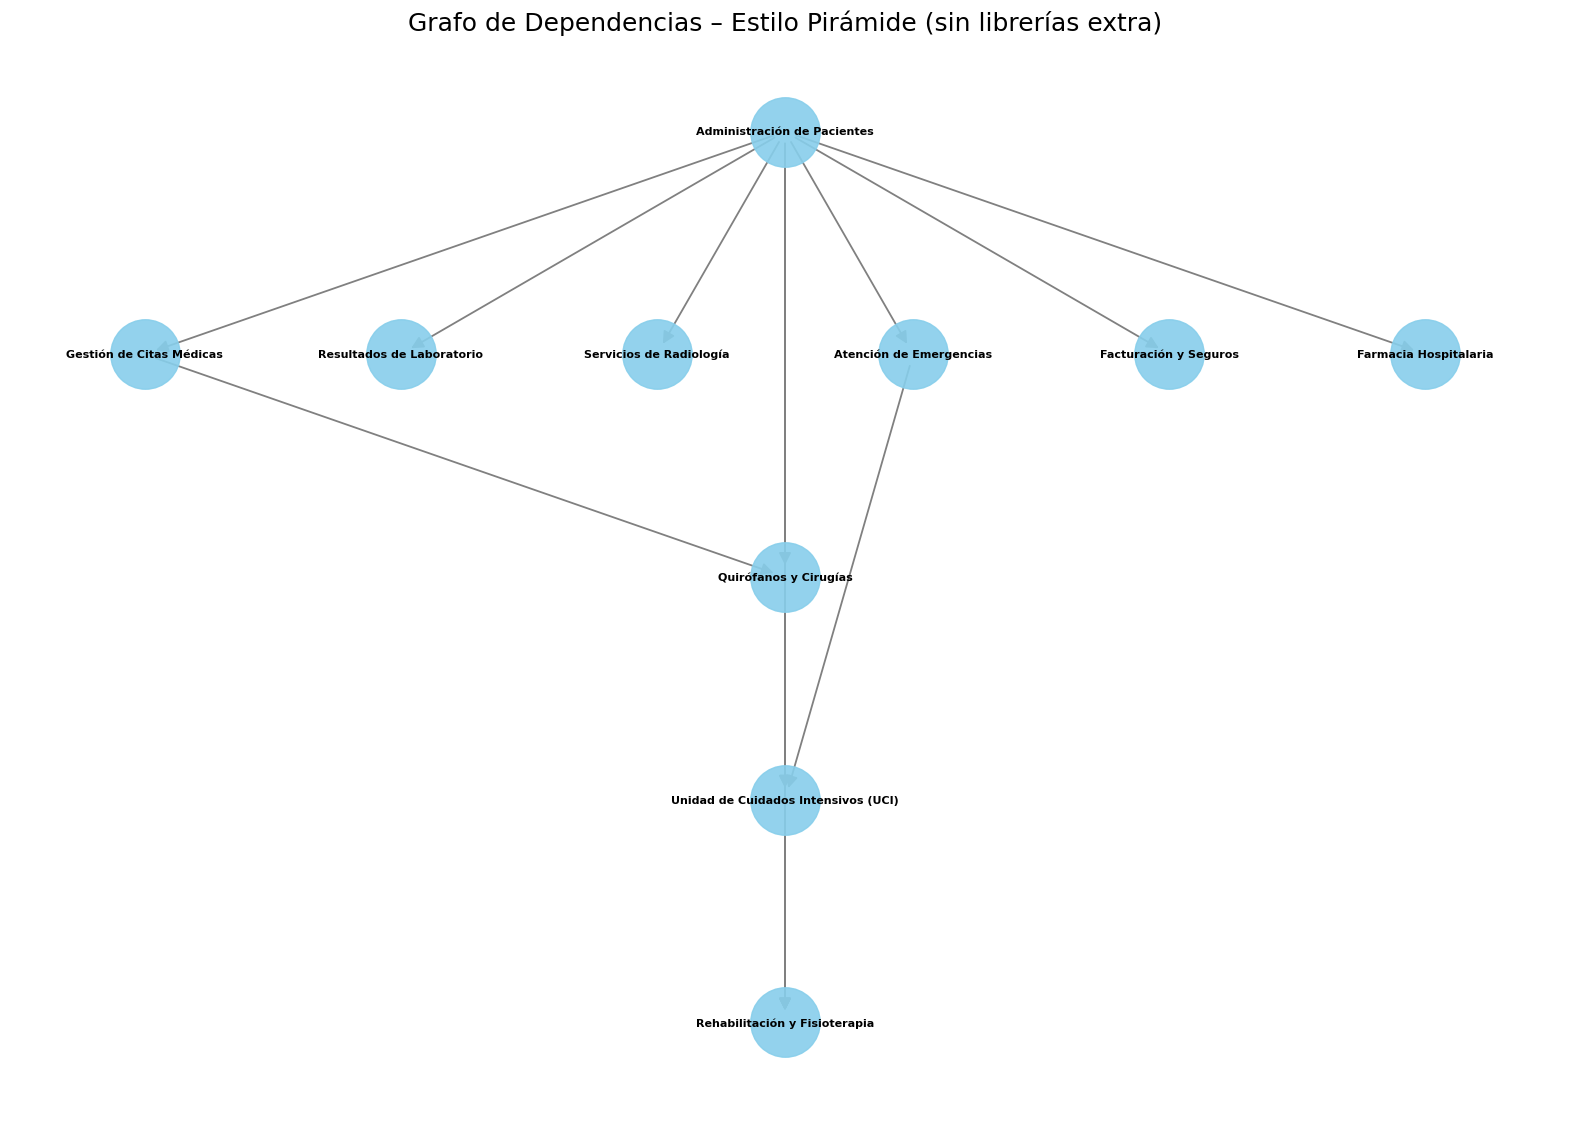

In [23]:
plt.figure(figsize=(20, 14))

pos = pyramid_layout(graph)

nx.draw_networkx_nodes(
    graph, pos,
    node_size=2500,
    node_color="skyblue",
    alpha=0.9
)

nx.draw_networkx_edges(
    graph, pos,
    arrows=True,
    arrowsize=18,
    width=1.3,
    edge_color="gray"
)

nx.draw_networkx_labels(
    graph, pos,
    font_size=8,
    font_weight="bold"
)

plt.title("Grafo de Dependencias – Estilo Pirámide (sin librerías extra)", size=18)
plt.axis("off")
plt.show()

### Creacion de Relevancia

In [27]:
RELEVANCE_THRESHOLD = 0.38
print(f"RELEVANCE_THRESHOLD definido como: {RELEVANCE_THRESHOLD}")

RELEVANCE_THRESHOLD definido como: 0.38


In [ ]:
# @title
import gradio as gr

def gradio_semantic_search(query):
    """
    Wrapper function for semantic_search_function to be used with Gradio.
    Returns a formatted string of the top 3 relevant functions.
    """
    if not isinstance(funcion_de_negocios, pd.DataFrame) or 'embeddings' not in funcion_de_negocios.columns:
        error_msg = "Error: DataFrame 'funcion_de_negocios' or 'embeddings' column not found. Please run previous cells."
        return error_msg, error_msg

    # Use .copy() to avoid SettingWithCopyWarning if modifications are made in semantic_search_function
    sorted_functions_df = semantic_search_function(query, funcion_de_negocios.copy())

    # Check if any relevant functions were found
    if sorted_functions_df.empty:
        no_results_msg = "No se encontraron funciones relevantes para la consulta."
        return no_results_msg, no_results_msg

    # Get the maximum similarity score for the query
    max_similarity = sorted_functions_df['similarity'].max()

    # Check against the RELEVANCE_THRESHOLD
    if max_similarity < RELEVANCE_THRESHOLD:
        irrelevant_msg = "Lo siento, tu solicitud no está relacionada con ninguna de las funciones hospitalarias disponibles. Por favor, intenta con otra consulta."
        return irrelevant_msg, irrelevant_msg

    # Prepare the output for the most relevant function
    first_result = sorted_functions_df.iloc[0]
    first_function_str = f"Función más relevante:\n"
    first_function_str += f"- ID: {first_result['id']}\n"
    first_function_str += f"  Nombre: {first_result['nombre de la funcion']}\n"
    first_function_str += f"  Descripción: {first_result['descripcion de la funcion']}\n"
    first_function_str += f"  Similitud: {first_result['similarity']:.4f}\n"

    # Prepare the output for the top 3 functions
    top_n_results = sorted_functions_df.head(3)
    top3_functions_str = "Top 3 funciones de negocio más relevantes:\n"
    for index, row in top_n_results.iterrows():
        top3_functions_str += f"- ID: {row['id']}\n"
        top3_functions_str += f"  Nombre: {row['nombre de la funcion']}\n"
        top3_functions_str += f"  Descripción: {row['descripcion de la funcion']}\n"
        top3_functions_str += f"  Similitud: {row['similarity']:.4f}\n"
        top3_functions_str += "\n"

    return first_function_str, top3_functions_str

# Create the Gradio interface
# Ensure that the Gradio interface is re-launched after modifying the function
iface = gr.Interface(
    fn=gradio_semantic_search,
    inputs=gr.Textbox(lines=2, placeholder="Ingresa tu consulta aquí...", label="Consulta de Búsqueda"),
    outputs=[
        gr.Textbox(lines=10, label="Función Más Relevante", interactive=False),
        gr.Textbox(lines=20, label="Top 3 Resultados de la Búsqueda Semántica", interactive=False)
    ],
    title="Buscador Semántico de Funciones Hospitalarias",
    description="Ingresa una consulta para encontrar las funciones hospitalarias más relevantes basadas en similitud semántica. Se mostrará la función más relevante y el top 3 de resultados."
)

# Launch the interface
iface.launch()

### Generación de Plan de Ejecución

In [30]:
dummy_functions_dict = {}

for index, row in funcion_de_negocios.iterrows():
    func_name = row['nombre de la funcion']

    # Define a dummy function for each business function
    def create_dummy_function(name):
        def dummy_func():
            print(f"Ejecutando {name}...")
            print(f"{name} completada.")
        return dummy_func

    dummy_functions_dict[func_name] = create_dummy_function(func_name)

print("Diccionario 'dummy_functions_dict' creado con funciones dummy:")
for func_name, dummy_func in dummy_functions_dict.items():
    print(f"- {func_name}: {dummy_func.__name__} (prints: 'Ejecutando {func_name}...' and '{func_name} completada.')")

Diccionario 'dummy_functions_dict' creado con funciones dummy:
- Administración de Pacientes: dummy_func (prints: 'Ejecutando Administración de Pacientes...' and 'Administración de Pacientes completada.')
- Gestión de Citas Médicas: dummy_func (prints: 'Ejecutando Gestión de Citas Médicas...' and 'Gestión de Citas Médicas completada.')
- Resultados de Laboratorio: dummy_func (prints: 'Ejecutando Resultados de Laboratorio...' and 'Resultados de Laboratorio completada.')
- Servicios de Radiología: dummy_func (prints: 'Ejecutando Servicios de Radiología...' and 'Servicios de Radiología completada.')
- Atención de Emergencias: dummy_func (prints: 'Ejecutando Atención de Emergencias...' and 'Atención de Emergencias completada.')
- Facturación y Seguros: dummy_func (prints: 'Ejecutando Facturación y Seguros...' and 'Facturación y Seguros completada.')
- Farmacia Hospitalaria: dummy_func (prints: 'Ejecutando Farmacia Hospitalaria...' and 'Farmacia Hospitalaria completada.')
- Quirófanos y Cir

In [31]:
import networkx as nx

def generate_execution_plan(target_function, graph):
    """
    Generates an ordered execution plan for a target hospital function
    based on its dependencies in the graph.

    Args:
        target_function (str): The name of the target hospital function.
        graph (nx.DiGraph): The directed graph representing function dependencies.

    Returns:
        list: An ordered list of functions to execute, or an empty list
              if the target function is not found or no plan can be generated.
    """
    if target_function not in graph:
        print(f"Error: La función objetivo '{target_function}' no se encuentra en el grafo.")
        return []

    # 1. Retrieve all ancestors (predecessors) of the target_function
    ancestors = nx.ancestors(graph, target_function)

    # 2. Create a set of all relevant nodes: ancestors + target_function itself
    relevant_nodes = ancestors.union({target_function})

    # 3. Create a subgraph containing only the relevant nodes
    subgraph = graph.subgraph(relevant_nodes)

    # 4. Perform a topological sort on the subgraph to get an ordered plan
    try:
        execution_plan = list(nx.topological_sort(subgraph))
    except nx.NetworkXUnfeasible:
        # This can happen if the subgraph contains a cycle, which should not
        # be the case for a well-defined dependency graph for execution planning.
        print(f"Advertencia: No se pudo generar un plan de ejecución para '{target_function}' debido a un ciclo de dependencias.")
        return []

    return execution_plan

print("Function 'generate_execution_plan' defined and ready.")

Function 'generate_execution_plan' defined and ready.


In [32]:
import io
import contextlib

def execute_plan(execution_plan, dummy_functions_dict):
    """
    Executes a given plan of hospital functions step by step, calling their dummy implementations.
    Captures and returns the output from each function.

    Args:
        execution_plan (list): An ordered list of function names to execute.
        dummy_functions_dict (dict): A dictionary mapping function names to their dummy implementations.

    Returns:
        list: A list of strings, where each string contains the captured output
              from the execution of a dummy function.
    """
    execution_log = []
    for function_name in execution_plan:
        if function_name in dummy_functions_dict:
            dummy_func = dummy_functions_dict[function_name]

            # Capture print output
            with io.StringIO() as buf, contextlib.redirect_stdout(buf):
                dummy_func()
                output = buf.getvalue()
                execution_log.append(f"--- Ejecutando: {function_name} ---\n{output}")
        else:
            execution_log.append(f"Error: Función '{function_name}' no encontrada en el diccionario de funciones dummy.")
    return execution_log

print("Function 'execute_plan' defined and ready.")

Function 'execute_plan' defined and ready.


In [ ]:
import gradio as gr
import pandas as pd # Ensure pandas is imported as it's used with DataFrames

def gradio_semantic_search(query):
    """
    Wrapper function for semantic_search_function to be used with Gradio.
    Returns a formatted string of the top 3 relevant functions, execution plan, and execution log.
    """
    global funcion_de_negocios, model, RELEVANCE_THRESHOLD, graph, dummy_functions_dict

    if not isinstance(funcion_de_negocios, pd.DataFrame) or 'embeddings' not in funcion_de_negocios.columns:
        error_msg = "Error: DataFrame 'funcion_de_negocios' or 'embeddings' column not found. Please run previous cells."
        return error_msg, error_msg, "", ""

    # Use .copy() to avoid SettingWithCopyWarning if modifications are made in semantic_search_function
    sorted_functions_df = semantic_search_function(query, funcion_de_negocios.copy())

    # Initialize outputs
    first_function_str = ""
    top3_functions_str = ""
    execution_plan_str = "No se generó plan de ejecución."
    execution_log_str = "No se ejecutó ningún plan."

    # Check if any relevant functions were found
    if sorted_functions_df.empty:
        no_results_msg = "No se encontraron funciones relevantes para la consulta."
        return no_results_msg, no_results_msg, execution_plan_str, execution_log_str

    # Get the maximum similarity score for the query
    max_similarity = sorted_functions_df['similarity'].max()

    # Check against the RELEVANCE_THRESHOLD
    if max_similarity < RELEVANCE_THRESHOLD:
        irrelevant_msg = "Lo siento, tu solicitud no está relacionada con ninguna de las funciones hospitalarias disponibles. Por favor, intenta con otra consulta."
        return irrelevant_msg, irrelevant_msg, execution_plan_str, execution_log_str

    # --- 1. Get the most relevant function and generate/execute plan ---
    most_relevant_function_name = sorted_functions_df.iloc[0]['nombre de la funcion']

    # Generate execution plan
    plan = generate_execution_plan(most_relevant_function_name, graph)
    if plan:
        execution_plan_str = "Plan de Ejecución para '" + most_relevant_function_name + "':\n" + " -> ".join(plan)
        # Execute the plan
        execution_log = execute_plan(plan, dummy_functions_dict)
        execution_log_str = "\n".join(execution_log)
    else:
        execution_plan_str = f"No se pudo generar un plan de ejecución para '{most_relevant_function_name}'."
        execution_log_str = f"No se ejecutó el plan para '{most_relevant_function_name}'."

    # Prepare the output for the most relevant function
    first_result = sorted_functions_df.iloc[0]
    first_function_str = f"Función más relevante:\n"
    first_function_str += f"- ID: {first_result['id']}\n"
    first_function_str += f"  Nombre: {first_result['nombre de la funcion']}\n"
    first_function_str += f"  Descripción: {first_result['descripcion de la funcion']}\n"
    first_function_str += f"  Similitud: {first_result['similarity']:.4f}\n"

    # Prepare the output for the top 3 functions
    top_n_results = sorted_functions_df.head(3)
    top3_functions_str = "Top 3 funciones de negocio más relevantes:\n"
    for index, row in top_n_results.iterrows():
        top3_functions_str += f"- ID: {row['id']}\n"
        top3_functions_str += f"  Nombre: {row['nombre de la funcion']}\n"
        top3_functions_str += f"  Descripción: {row['descripcion de la funcion']}\n"
        top3_functions_str += f"  Similitud: {row['similarity']:.4f}\n"
        top3_functions_str += "\n"

    return first_function_str, top3_functions_str, execution_plan_str, execution_log_str

# Create the Gradio interface
# Ensure that the Gradio interface is re-launched after modifying the function
iface = gr.Interface(
    fn=gradio_semantic_search,
    inputs=gr.Textbox(lines=2, placeholder="Ingresa tu consulta aquí...", label="Consulta de Búsqueda"),
    outputs=[
        gr.Textbox(lines=10, label="Función Más Relevante", interactive=False),
        gr.Textbox(lines=20, label="Top 3 Resultados de la Búsqueda Semántica", interactive=False),
        gr.Textbox(lines=5, label="Plan de Ejecución", interactive=False),
        gr.Textbox(lines=15, label="Log de Ejecución", interactive=False)
    ],
    title="Buscador Semántico y Planificador de Funciones Hospitalarias",
    description="Ingresa una consulta para encontrar las funciones hospitalarias más relevantes basadas en similitud semántica, ver su plan de ejecución y simular su proceso."
)

# Launch the interface
iface.launch(debug=True)
